In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-production/Electric_Production.csv


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import warnings

In [61]:
data= pd.read_csv('../input/electric-production/Electric_Production.csv')

data['DATE']= pd.to_datetime(data['DATE'], infer_datetime_format=True)
Electricity=data.set_index(['DATE'])

In [62]:
from datetime import datetime
Electricity.head(5)

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


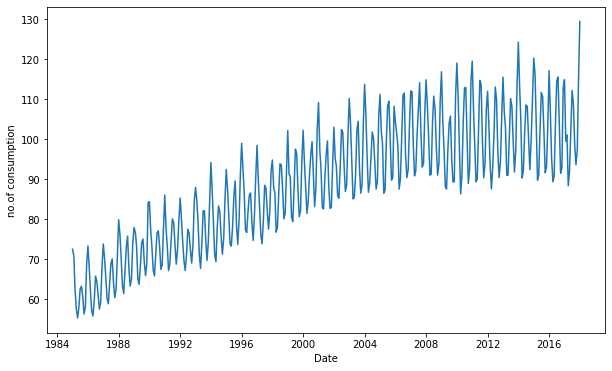

In [63]:
plt.xlabel('Date')
plt.ylabel('no.of consumption')
plt.plot(Electricity)

In [64]:
rolmean= Electricity.rolling(window=12).mean()
rolstd= Electricity.rolling(window=12).std()
print (rolmean,rolstd)

                 Value
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]                 Value
DATE                 
1985-01-01        NaN
1985-02-01        NaN
1985-03-01        NaN
1985-04-01        NaN
1985-05-01        NaN
...               ...
2017-09-01   9.155641
2017-10-01   8.968447
2017-11-01   8.671317
2017-12-01   8.911131
2018-01-01  11.454780

[397 rows x 1 columns]


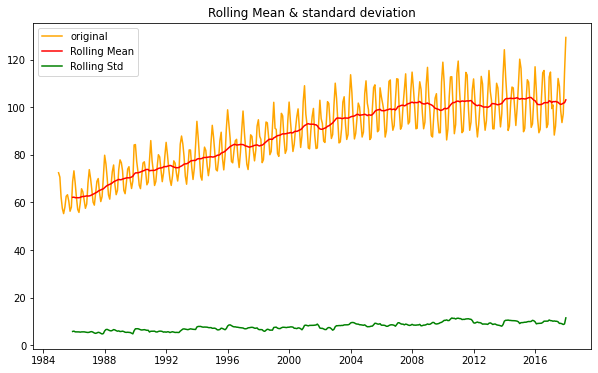

In [65]:
orig = plt.plot(Electricity, color= 'orange',label = 'original')
mean= plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt. plot (rolstd, color = 'Green', label ='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & standard deviation')
plt.show(block = False)

In [66]:
from statsmodels.tsa.stattools import adfuller

print('Result of dickey fuller test:')
dftest = adfuller(Electricity['Value'], autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index =['Test Statistic','p-value', '#Lags Used', ' Number  of Observations Used'])
for key,value in dftest [4].items():
    dfoutput['critical Value (%s) '%key] = value
    
print(dfoutput)

Result of dickey fuller test:
Test Statistic                    -2.256990
p-value                            0.186215
#Lags Used                        15.000000
 Number  of Observations Used    381.000000
critical Value (1%)               -3.447631
critical Value (5%)               -2.869156
critical Value (10%)              -2.570827
dtype: float64


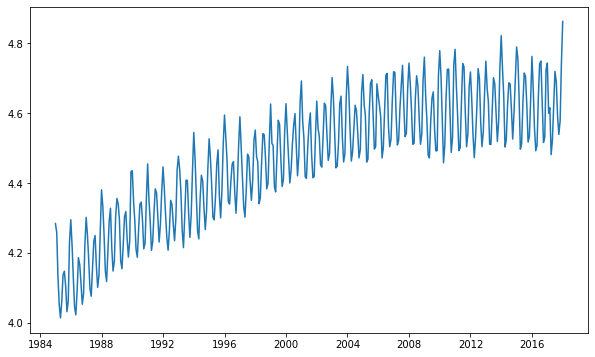

In [67]:
Electricity_log = np.log(Electricity)
plt.plot(Electricity_log)

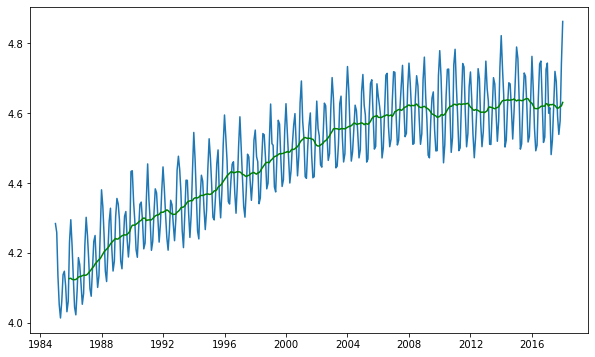

In [68]:
MovingAvg = Electricity_log. rolling(window= 12).mean()
MovingSTD = Electricity_log.rolling(window=12).std()
plt.plot(Electricity_log)
plt.plot(MovingAvg , color ='green')

In [69]:
Deduction = Electricity_log- MovingAvg
Deduction.head(12)

Deduction.dropna(inplace=True)
Deduction.head(10)

,Value
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


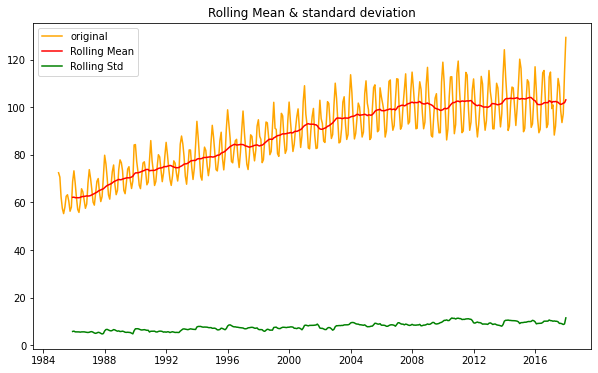

Result of dickey fuller test:
Test Statistic                    -2.256990
p-value                            0.186215
#Lags Used                        15.000000
 Number  of Observations Used    381.000000
critical Value (1%)               -3.447631
critical Value (5%)               -2.869156
critical Value (10%)              -2.570827
dtype: float64


In [70]:
from  statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    MovingAvg = timeseries.rolling(window=12).mean()
    MovingStd = timeseries.rolling(window=12).std()
    
orig = plt.plot(Electricity, color= 'orange',label = 'original')
mean= plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt. plot (rolstd, color = 'Green', label ='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & standard deviation')
plt.show(block = False)
    
print('Result of dickey fuller test:')
dftest = adfuller(Electricity['Value'], autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index =['Test Statistic','p-value', '#Lags Used', ' Number  of Observations Used'])
for key,value in dftest [4].items():
    dfoutput['critical Value (%s) '%key] = value
    
print(dfoutput)

In [71]:
test_stationarity(Deduction)

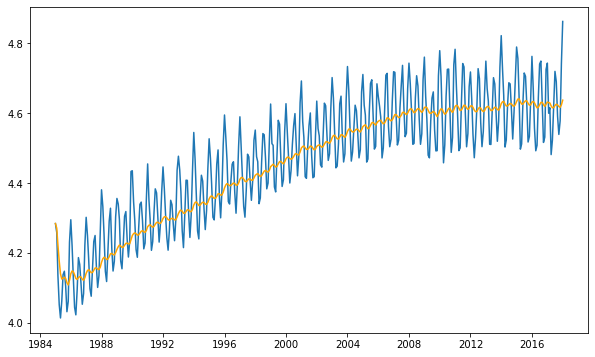

In [72]:
exponential = Electricity_log.ewm(halflife=12, min_periods= 0, adjust=True).mean()
plt.plot(Electricity_log)
plt.plot(exponential, color = 'orange')

In [73]:
datalogScale = Electricity_log - exponential
test_stationarity(datalogScale)

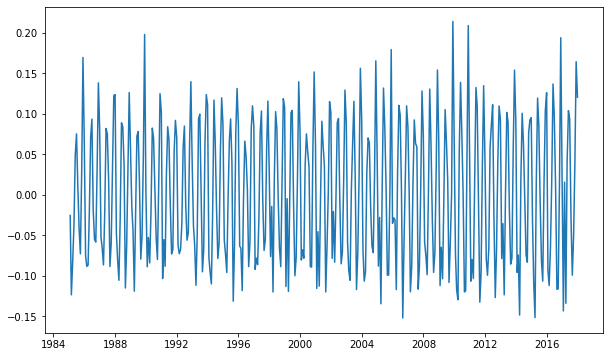

In [74]:
Diffshifting = Electricity_log - Electricity_log.shift()
plt.plot(Diffshifting )

In [75]:
Diffshifting.dropna(inplace=True)
test_stationarity(Diffshifting)

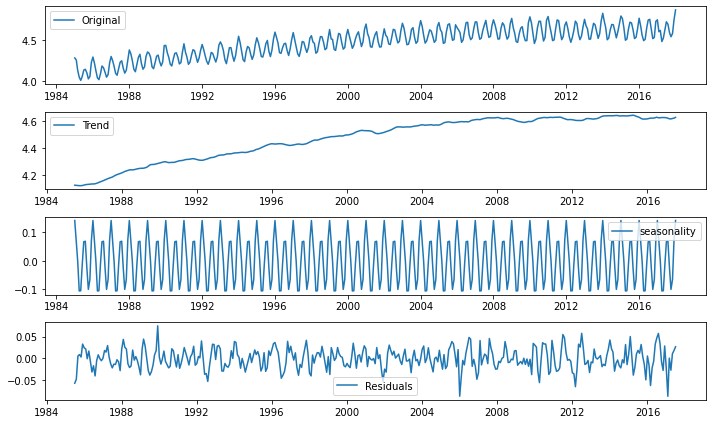

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Electricity_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
 
plt.subplot(411)
plt.plot(Electricity_logScale,  label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc ='best')
plt.subplot(413)
plt.plot(seasonal, label ='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label ='Residuals')
plt.legend(loc='best')
plt.tight_layout()
  

decomposedlogdata = residual
decomposedlogdata.dropna(inplace =True)
test_stationarity(decomposedlogdata)



In [77]:
decomposeddata = residual
decomposeddata.dropna(inplace =True)
test_stationarity(decomposeddata)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


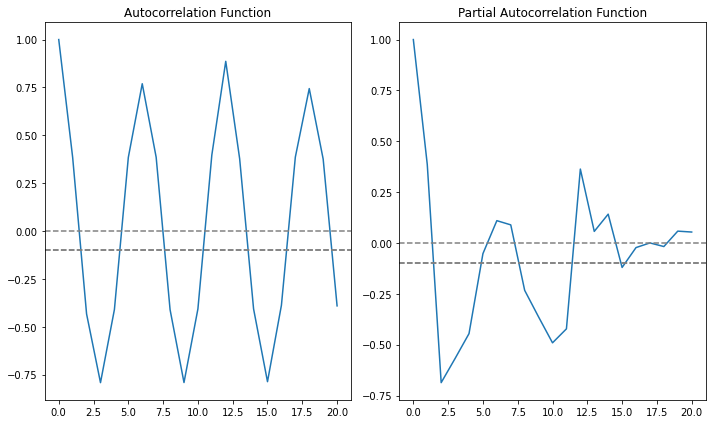

In [78]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(Diffshifting, nlags= 20)
lag_pacf = pacf(Diffshifting, nlags= 20, method= 'ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color= 'gray')
plt.axhline(y =-1.96/np.sqrt(len(Diffshifting)), linestyle='--', color= 'gray')
plt.axhline(y =-1.96/np.sqrt(len(Diffshifting)), linestyle='--', color= 'gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0,linestyle ='--', color ='gray')
plt.axhline(y =-1.96/np.sqrt(len(Diffshifting)), linestyle='--', color= 'gray')
plt.axhline(y =-1.96/np.sqrt(len(Diffshifting)), linestyle='--', color= 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Plotting AR model


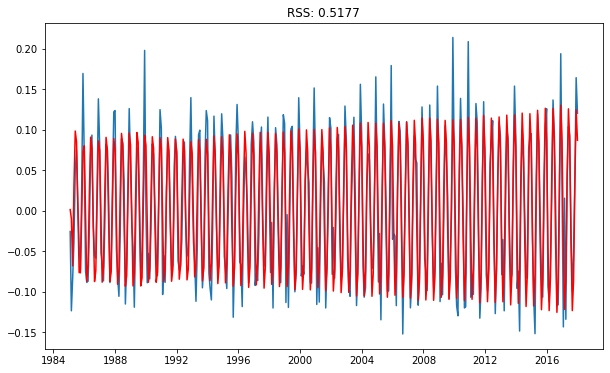

In [79]:
from statsmodels .tsa.arima_model import ARIMA

model= ARIMA(Electricity_log, order=(2,1,2))
results_AR= model.fit(disp =-1)
plt.plot(Diffshifting)
plt.plot(results_AR.fittedvalues, color ='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues- Diffshifting['Value'])**2))
print('Plotting AR model')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


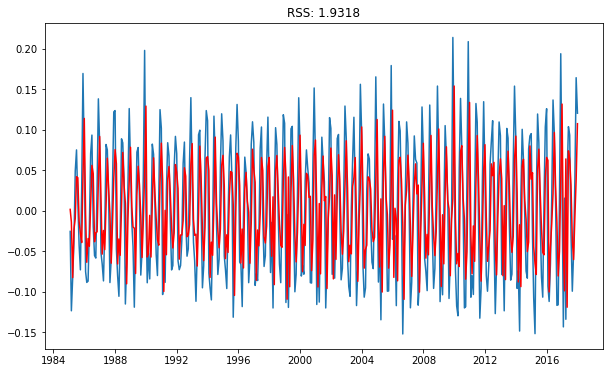

In [80]:
model= ARIMA(Electricity_log, order=(0,1,2))
results_MA= model.fit(disp =-1)
plt.plot(Diffshifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues- Diffshifting['Value'])**2))
print('Plotting AR model')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well

Text(0.5, 1.0, 'RSS: 0.5177')

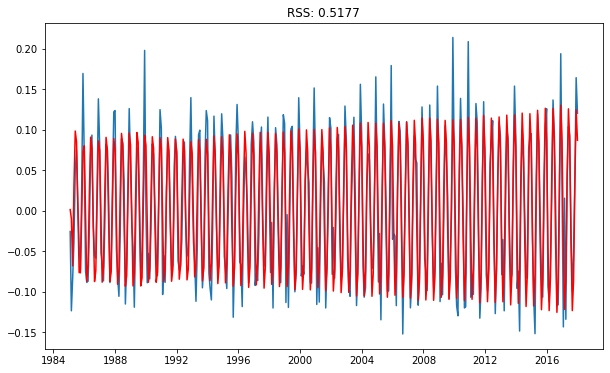

In [81]:
model= ARIMA(Electricity_log, order=(2,1,2))
results_ARIMA= model.fit(disp =-1)
plt.plot(Diffshifting)
plt.plot(results_ARIMA.fittedvalues, color ='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues- Diffshifting['Value'])**2))


In [82]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())


DATE
1985-02-01    0.001364
1985-03-01   -0.009794
1985-04-01   -0.068184
1985-05-01    0.030592
1985-06-01    0.098425
dtype: float64


In [83]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1985-02-01    0.001364
1985-03-01   -0.008430
1985-04-01   -0.076614
1985-05-01   -0.046023
1985-06-01    0.052403
dtype: float64


In [84]:
predictions_ARIMA_log = pd.Series(Electricity['Value'].iloc[0], index= Electricity_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

DATE
1985-01-01    72.505200
1985-02-01    72.506564
1985-03-01    72.496770
1985-04-01    72.428586
1985-05-01    72.459177
dtype: float64

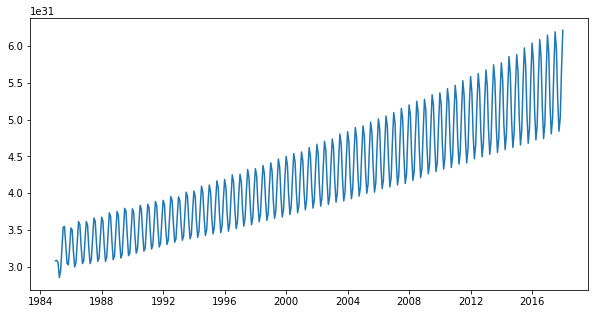

In [85]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,5))
plt.plot(predictions_ARIMA)